In [1]:
import pandas as pd
import numpy as np
import string
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
df = pd.read_csv('data/data.csv', encoding='latin-1')

In [3]:
print(len(df))

1653


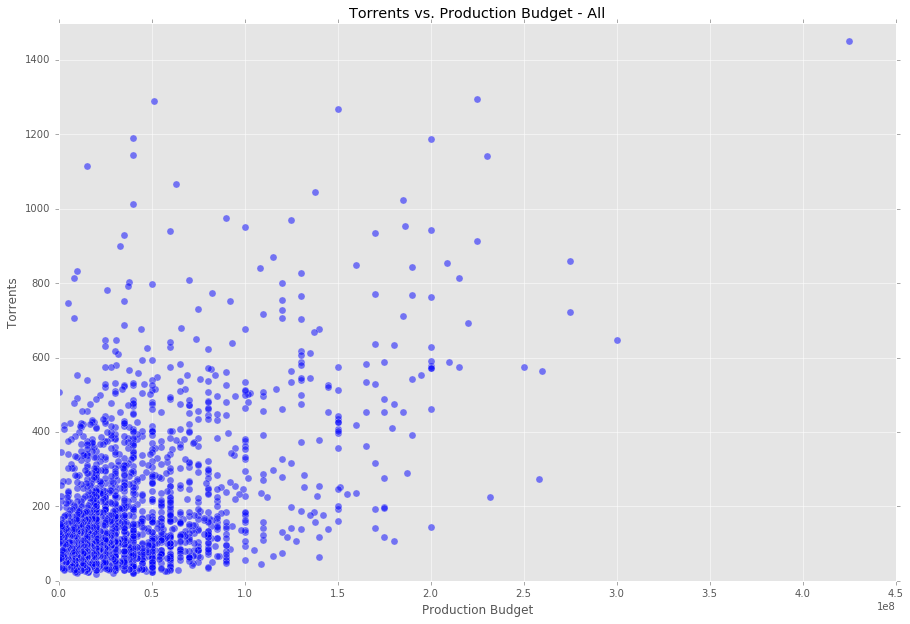

In [4]:
plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - All')
plt.scatter(df['Prod_Budget'], df['Total_Torrents'], alpha=0.5, s=50)

In [5]:
# unique list of grouped directors
unq_directors = df['Director'].unique()
unq_directors = unq_directors.tolist()

# unique list of individual directors
ind_director = set()

for lst in unq_directors:
    for director in lst.split(','):
        ind_director.add(director.strip())
ind_director = sorted(ind_director)

print(len(ind_director))
#print(ind_director)

929


In [6]:
# dictionary - count of director occurences
count = defaultdict(lambda:0)

for director in ind_director:
    count[director] = df.Director.str.contains(director).sum()

import operator
srt = sorted(count.items(), key=operator.itemgetter(1))
srt = srt[::-1]
#print(srt)
#print(count)

srt_five = [(director, ct) for director, ct in srt if ct > 5]
print(len(srt_five))
print(srt_five)

40
[('Steven Spielberg', 16), ('Ridley Scott', 13), ('Robert Zemeckis', 10), ('Steven Soderbergh', 10), ('Richard Donner', 10), ('McG', 10), ('Tony Scott', 10), ('Robert Rodriguez', 9), ('Tim Burton', 9), ('Clint Eastwood', 9), ('Oliver Stone', 9), ('Brett Ratner', 8), ('Kevin Smith', 8), ('Martin Scorsese', 8), ('Chris Columbus', 8), ('Joel Schumacher', 8), ('Shawn Levy', 7), ('Peter Farrelly', 7), ('F. Gary Gray', 7), ('Ron Howard', 7), ('John McTiernan', 7), ('M. Night Shyamalan', 7), ('Brian De Palma', 7), ('David Fincher', 7), ('Antoine Fuqua', 7), ('Jaume Collet-Serra', 6), ('Paul W.S. Anderson', 6), ('Phillip Noyce', 6), ('Wes Craven', 6), ('Ethan Coen', 6), ('Bobby Farrelly', 6), ('Garry Marshall', 6), ('Ivan Reitman', 6), ('Martin Campbell', 6), ('Joel Coen', 6), ('Frank Coraci', 6), ('Barry Levinson', 6), ('James Cameron', 6), ('Adam Shankman', 6), ('Woody Allen', 6)]


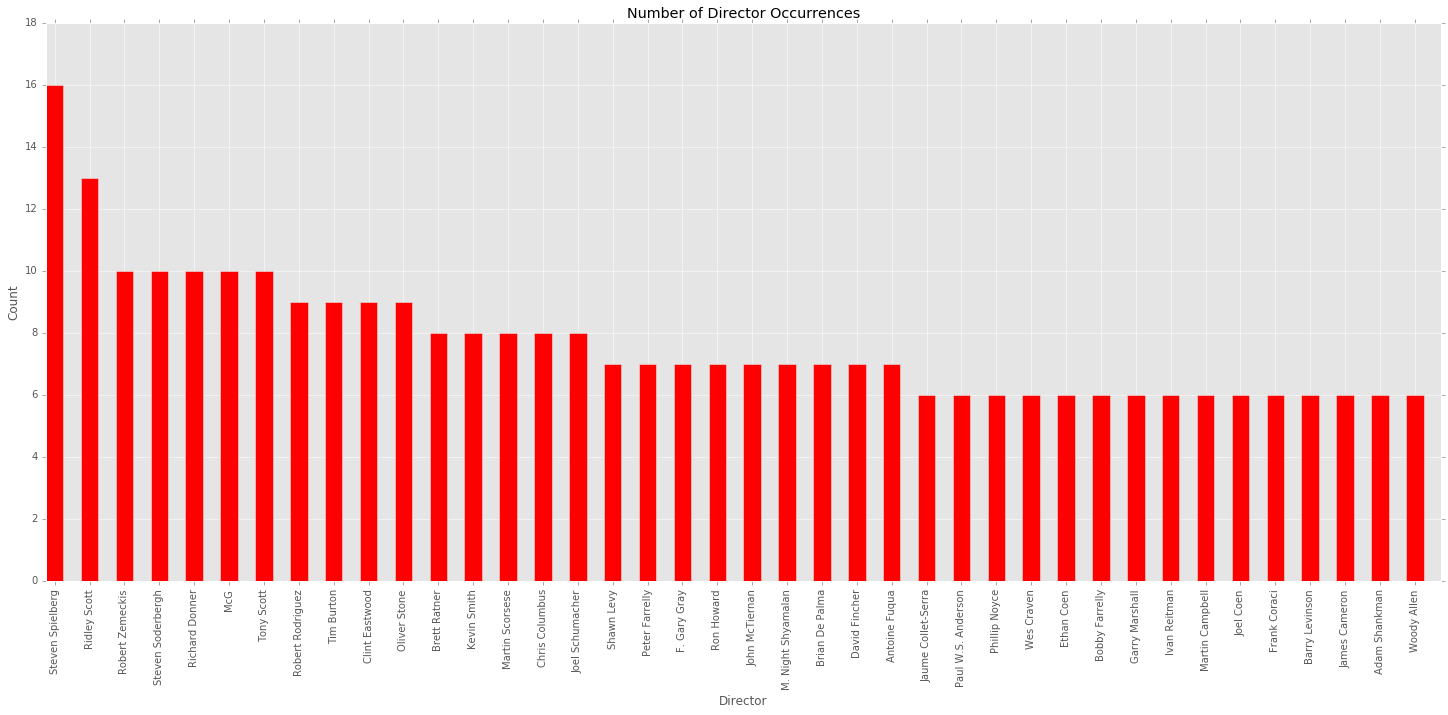

In [7]:
plt.figure(figsize=(25,10))

ind = np.arange(len(srt_five)) # the x locations for the groups
width = 0.5 # the width of the bars

bar_director = [director for director, count in srt_five]
bar_count = [count for director, count in srt_five]

plt.bar(ind, bar_count, width, color='r')

plt.ylabel('Count')
plt.xlabel('Director')
plt.title('Number of Director Occurrences')
plt.xticks(ind + width/2.0, (bar_director), rotation='vertical')
plt.yticks(np.arange(0, 19, 2))
plt.show()

In [8]:
# return tuple of (string, list)
tup_lst = []
for director_gp in unq_directors:
    temp = []
    for director in director_gp.split():
        temp.append(director)
    tup_lst.append((director_gp, temp))

In [9]:
def srch_lst(term, t_lst):
    srch = []
    for st, lst in t_lst:
        if term in st:
            srch.append(st)
    return srch
print(srch_lst('Steven Spielberg', tup_lst))
print(srch_lst('Brad Lewis', tup_lst))

['Steven Spielberg']
['John Lasseter, Brad Lewis']


16


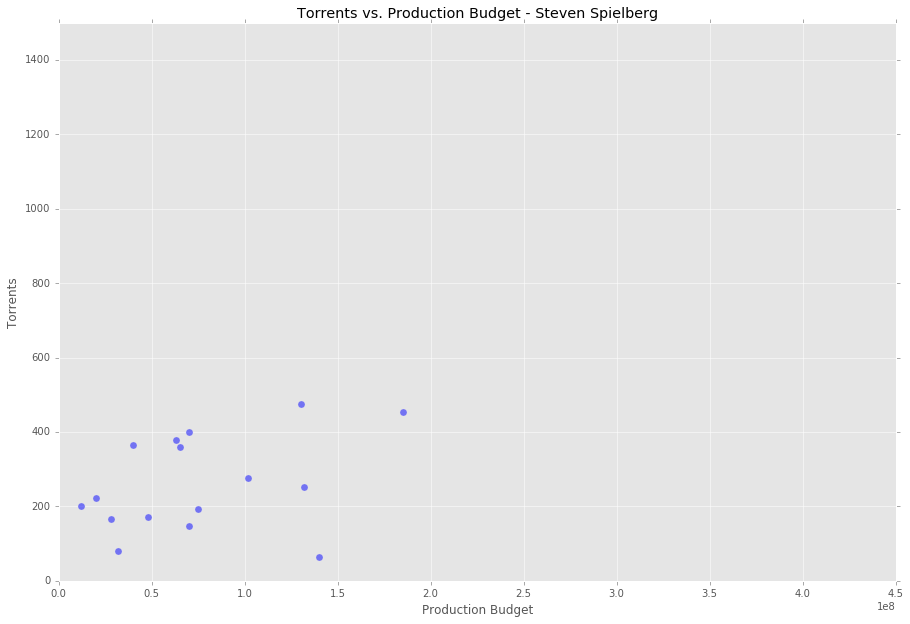

In [10]:
term = 'Steven Spielberg'
df_a = df.loc[df['Director'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

13


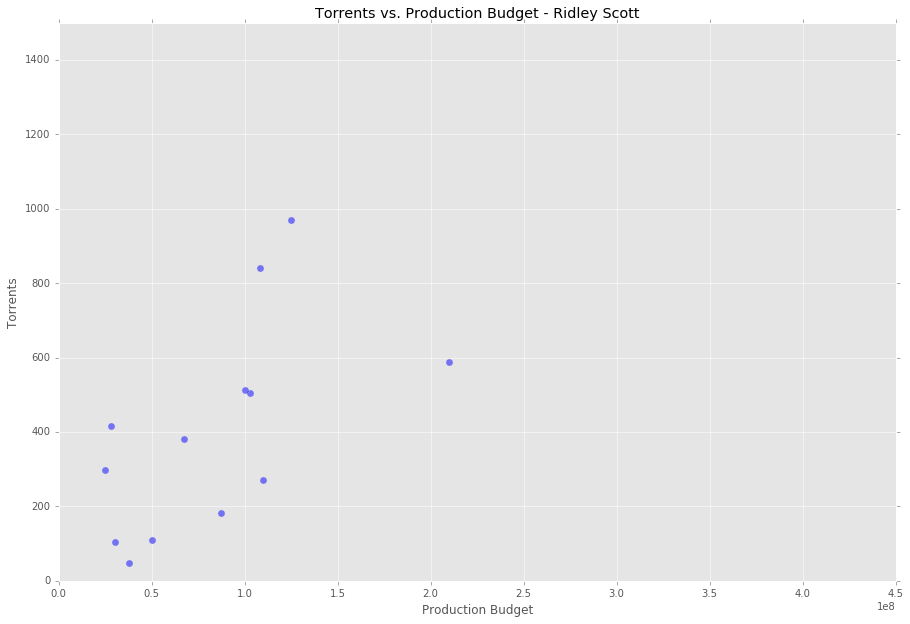

In [11]:
term = 'Ridley Scott'
df_a = df.loc[df['Director'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

0


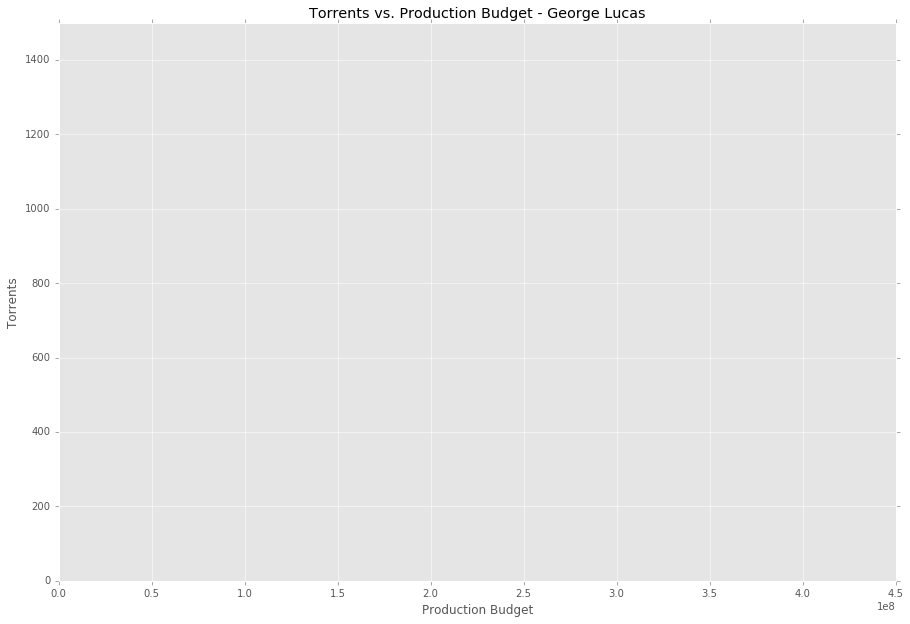

In [12]:
term = 'George Lucas'
df_a = df.loc[df['Director'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

6


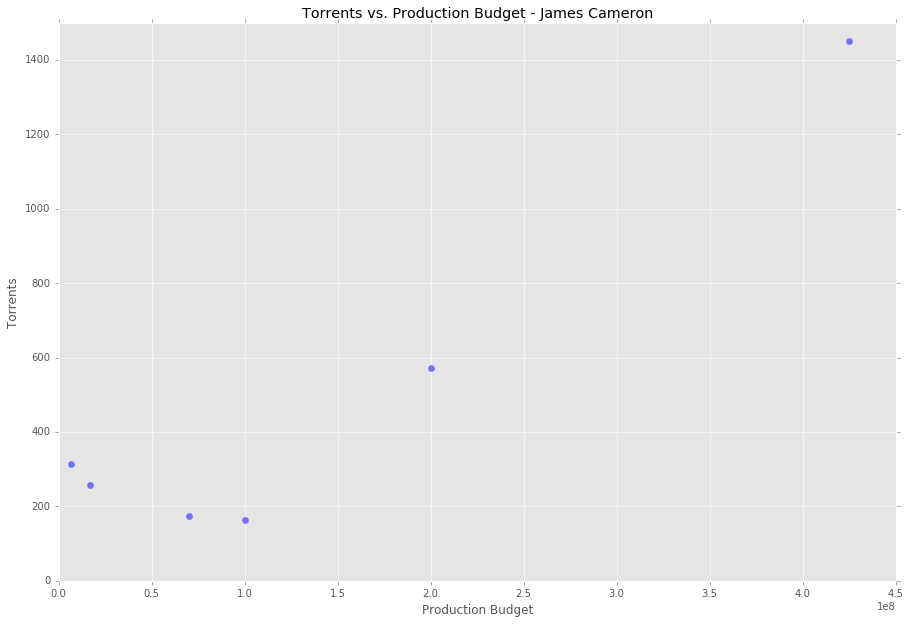

In [13]:
term = 'James Cameron'
df_a = df.loc[df['Director'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

5


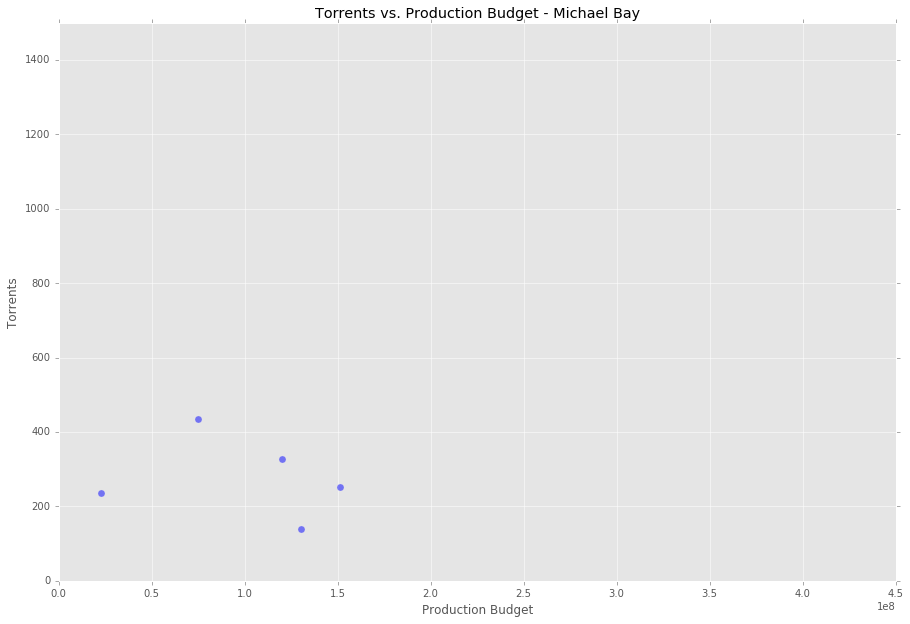

In [14]:
term = 'Michael Bay'
df_a = df.loc[df['Director'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

In [15]:
df['Director'].value_counts()

Steven Spielberg                                                           16
Ridley Scott                                                               13
Tony Scott                                                                 10
Steven Soderbergh                                                          10
Richard Donner                                                             10
Robert Zemeckis                                                            10
Tim Burton                                                                  9
Clint Eastwood                                                              9
Oliver Stone                                                                9
Kevin Smith                                                                 8
Chris Columbus                                                              8
Joel Schumacher                                                             8
Martin Scorsese                                                 